<a href="https://colab.research.google.com/github/yasminsarkhosh/fyp2021p3/blob/main/FYP_project_3_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get some images and import packages

In [ ]:
if True:      #A weird trick needed for Google Colab
  # Clone repository with example images 
  !rm -rf fyp2021p3
  !git clone https://github.com/vcheplygina/fyp2021p3.git


import matplotlib.pyplot as plt
import numpy as np

# Other useful packages might be skimage or PIL


Cloning into 'fyp2021p3'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 384 (delta 4), reused 2 (delta 0), pack-reused 374
Receiving objects: 100% (384/384), 855.59 MiB | 35.42 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Checking out files: 100% (366/366), done.


# Explore an image from the dataset

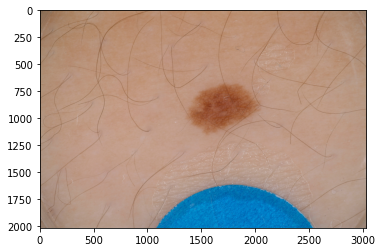

In [ ]:
# Load an image and display it

im = plt.imread('fyp2021p3/data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [ ]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want


(2016, 3024, 3)
uint8


[  0 121 196]


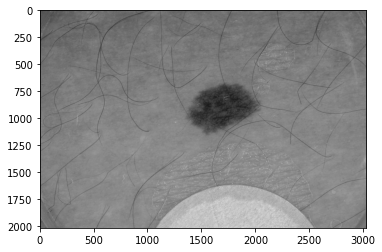

In [ ]:

# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')



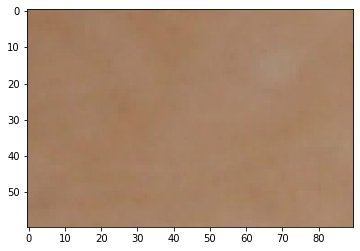

In [ ]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)



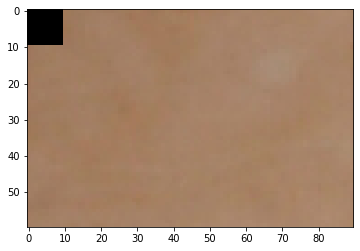

In [ ]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)


# Explore the segmentation mask

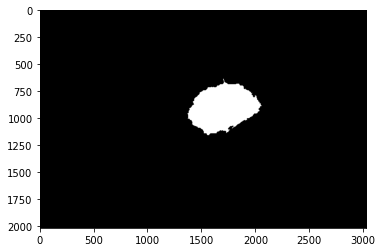

In [ ]:
# Load the mask and display it

mask=plt.imread('fyp2021p3/data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')


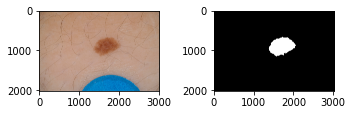

In [ ]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

(3024, 2016)


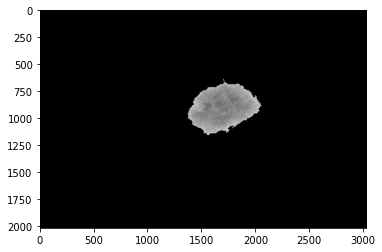

In [ ]:
# Show the images overlayed, for this we can use PIL 

#!pip install pillow 
from PIL import Image 

# Load images as Image objects  
img1 = Image.open('fyp2021p3/data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('fyp2021p3/data/example_segmentation/ISIC_0001769_segmentation.png') 
  
# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 
  
# Display 
img2.show()  # This doesn't actually display an image in Google Colab :(
plt.imshow(img2, cmap='gray')


# Note that this is a single channel image
print(img2.size)          

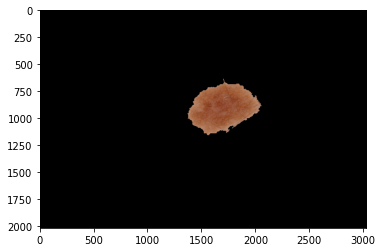

In [ ]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

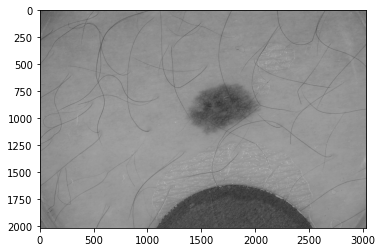

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('fyp2021p3/data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 30.8695,  53.1626,  75.4557,  97.7488, 120.0419, 142.335 ,
        164.6281, 186.9212, 209.2143, 231.5074, 253.8005]),
 <a list of 3024 Lists of Patches objects>)

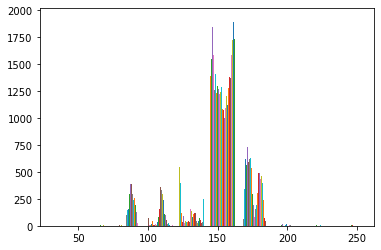

In [ ]:
plt.hist(gray)

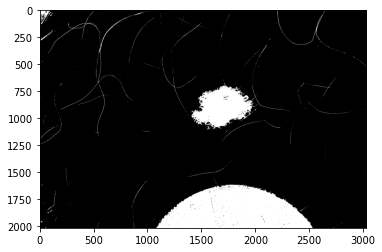

In [ ]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')